In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [61]:
dpdz = -4
R = 2
yield_stress = 0.1
mu = 4 * pow(10, -3)

In [43]:
def newtonian(r):
    return dpdz * (r**2 - R**2) / (4 * mu)

newtonian = np.vectorize(newtonian)

def bingham(r):
    if r < 0:
        r *= - 1
    return 2 * newtonian(r) - 2 * yield_stress * (r - R) / mu

bingham = np.vectorize(bingham)

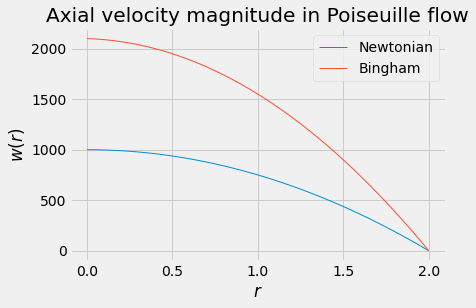

In [50]:
r = np.linspace(0, R, 50)
with plt.style.context('fivethirtyeight'):
    plt.plot(r, newtonian(r), label='Newtonian', linewidth=1)
    plt.plot(r, bingham(r), label='Bingham', linewidth=1)
    plt.title('Axial velocity magnitude in Poiseuille flow')
    plt.xlabel('$r$')
    plt.ylabel('$w(r)$')
    plt.legend()
    plt.show()

In [54]:
def output(dpdz):
    part_1 = -np.math.pi * dpdz * np.math.pow(R, 4) / (4 * mu)
    part_2 = 4 * np.math.pi * yield_stress * pow(R, 3) / (6 * mu)
    return part_1 + part_2

output = np.vectorize(output)

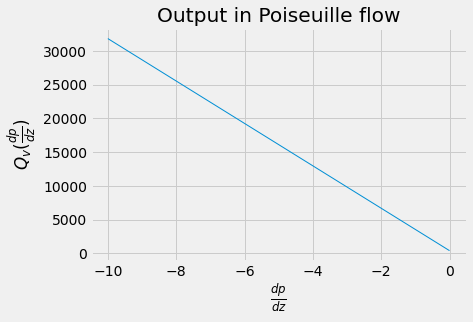

In [63]:
dp = np.linspace(-10, 0, 50)
with plt.style.context('fivethirtyeight'):
    plt.plot(dp, output(dp), linewidth=1)
    plt.title('Output in Poiseuille flow')
    plt.xlabel(r'$\frac{dp}{dz}$')
    plt.ylabel(r'$Q_{v}(\frac{dp}{dz})$')
    plt.show()